# SVM for Classification using SVC method

# SVM - Support vector Machines

Its a discriminative classifier that uses hyperplanes to seperate the categories of datapoints. 

Categories are formed such that **gaps** separeting the different categories are as wide as possible.
and Hyperplanes used to separate are choosen who gives maximum gaps.


# Binary Classifier
However SVM is a binary classifier it can be used as multiclass classifier by training SVM models for each pair of class and combine them all together.

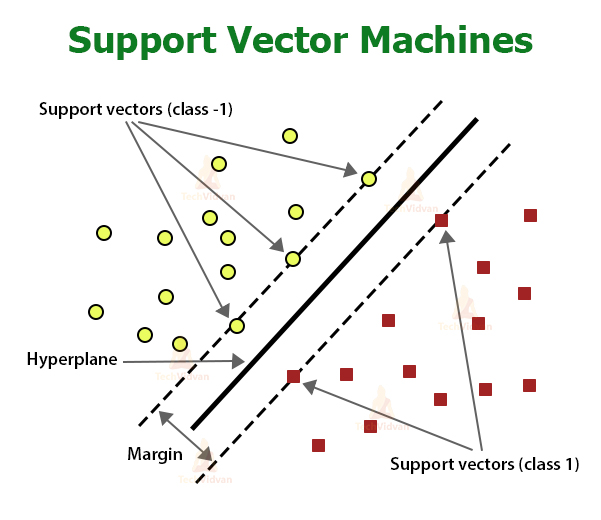

**Hyperplanes -** 
Two classes are separated by plane in multidimension called as hyperplane.

**Marginal Distane -**
SVM Optimizes the hyperplanes such that marginal distances are maximum.

**Marginal planes -**
Marginal planes are obtained such that each marginal plane is at extreme point nearest to hyperplane one at extrme positive point and one at extreme negative point, and they are called as marginal positive and marginal negative planes respectively

**Support vectors -**
As discussed above, their are two marginal planes and some of the extreme datapoints lies on this marginal planes, this datapoint are called as **Support Vectors** as they are nothing but the vector of features given as input to model.

**Types of Problems -**
1. Linearly separeble
2. Linearly non-separable

To when classes are unable to separate by hyperplane in 2D they are convertd to 3D or multidimensions by using kernals.
#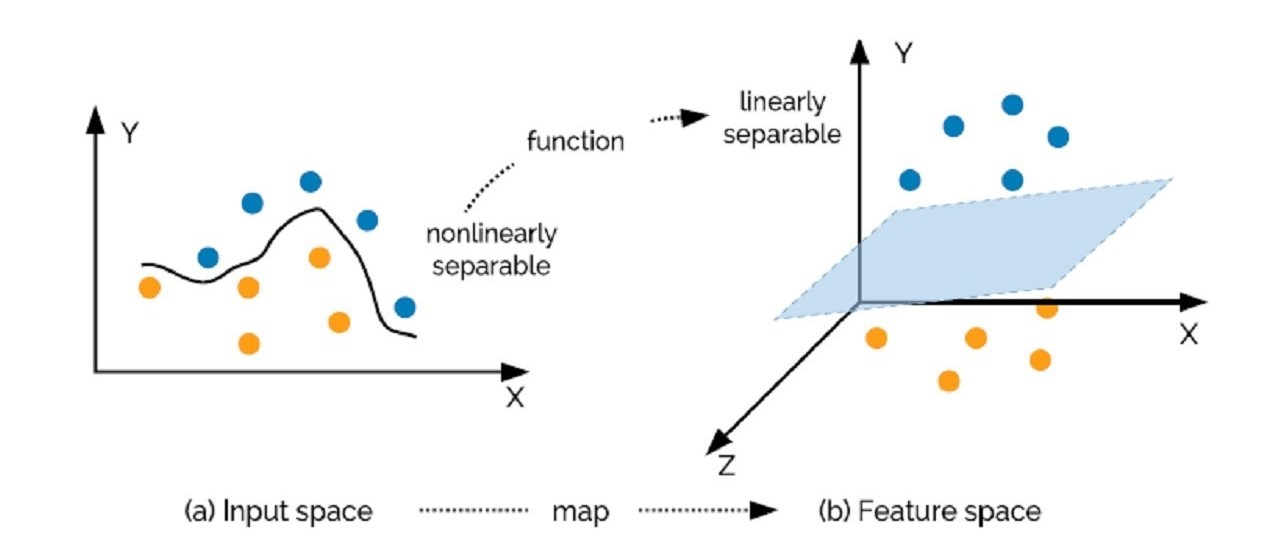


**SVM Kernals -** SVM Kernal do some transformation from lower to higher dimensions with the help of mathematical formulae. So that the non-linearly separable data sets are separeted by single hyperplane.

1. linear
2. polynomial
3. rgf 



**Types of Margines -** 
1. Soft Margine - Datapoints can lies inside the space defined by Marginal planes e.g.` C=3 ` then their are 3 points lies in space between two marginal planes.

2. Hard Margine - Strictly separates two categories no points in space between marginal planes.

# Methods in SVM
1. **Regression -**
  1. **`SVR & NuSVR `-** NuSVR implements a slightly different formulation than SVR
  2. **`LinearSVR `-** It provides a faster implementation than SVR but only considers the linear kernel
2. **Classification -** Methods used for classification problems are as follows 
  1. **` SVC & NuSVC `-** These methods are capable of doing Binary as well as Multiclass Classification on DataSets. SVC & NuSVC are similar methods excpet some of the parameters taken are different.
  3. **` LinearSVC `-** Used to classify using linear separation method and it does not take "Kernel" parameter as it is only       linear separation.

 


# Advantages of SVM:

1. Effective in high dimensional spaces.

2. Still effective in cases where number of dimensions is greater than the number of samples.

3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

# Disadvantages of SVM:

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

## 1. Importing Modules for Machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2. Loading The Data

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Converting Data to Pandas Dataframes 

1. **`df_feature `-** will be having feature vectors.Give data from "data" column of cancer dataset and column names are given by cancer['feature_names`] method.

2. **`df_target `-** will be having target of prediction of models. name to column is manually given as "is_malignant_cancer" whose value is 1 when true and 0 when false

In [6]:
df_feature = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df_target = pd.DataFrame(cancer['target'], columns=['is_malignant_cancer'])

## 3. Exploring The Data

In [8]:
df_feature.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df_target.tail()

,is_malignant_cancer
564,0
565,0
566,0
567,0
568,1


In [10]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   is_malignant_cancer  569 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB


### As all the columns having same length as well as having no null-value we can use the dataset for further analysis 

# 4. Splitting The Data

We import the **` train_test_split() `** function from **`sklearn.model_selection`** module, It has following attributes.

1. **` X `-** Features data, it has data of different features which is ploted in multdimensions and for which targetis known as Positive or Negative class in target dataset.

2. **` y `-** Target data used to train and test model.

3. **` test_size `-** [0.1 to 0.9] - for 0.2 it creates random groups of train and test data set where 20% data is used for testing and 80% for training.(e.g. when data is having 10 rows 20 are used for testing)

4. **` random_state `-** by assigning any number to random_state, the splits generated by scikit learn can be reproduce with the giving same number to this parameter otherwise every time it will create different permuations, It can be any number and dont influence the model performance. just helps to bookmark the permutation generated by split function.

In [12]:
X = df_feature
y = df_target

X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 5. Model Generation

We import the **` SVC `** model from **` sklearn.model_selection `** module.

**SVC() takes following Parameters -**

1. **`C`-** default=1 , values=[0.1 to 1000] or any value -
It controlls the regularization of model.

2. **`degree`-** default=3, any int value -
It controlls degree of polynomial in "poly" kernel, and ignored in all other kernels

3. **`gamma`-** default=scale, value=[scale, auto]or[1 to 0.0001] -  
kernel coefficient in "poly", "rbg", "sigmoid" 

4. **`kernel`-** default='linear' values=['linear,'poly','rgb','sigmoid','precomputed']

**Assign this model to variable and use the function attributes of model `SVC` with reference to that variable.**

Function attributes of **` SVC `** model are - 
1. **` fit_status `-** 
0 if correctly fitted, 1 otherwise (will raise warning)
2. **` support_`-** 
Indices of support vectors.
3. **` support_vectors_`-** 
Support vectors.
4. **` n_support_ ` -**
Number of support vectors for each class.


### Model without giving any parmeter to SVC()

In [13]:
model = SVC()

In [14]:
model.fit(X,y)

SVC()

In [15]:
y_pred = model.predict(X_test)

#### Evaluation of Model 

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [17]:
print(confusion_matrix(y_test, y_pred))

[[37  6]
 [ 0 71]]


# 6. Optimizing the Model with Hyperparameter Tuning

## Hyperparameter Tuning - 
Hyperprameter tuning is the method in which we find the **` optimum values `** or **` best values `** of parameters given to form the model.

**Steps in hyperparameter tuning**
1. Form the dictionary of parameters, where their is keys as a name of parameter and values are the lists of probable values of thos respective parameters.

2. import the **` GridSearchCV `** from **sklearn.model_selection** module.

3. Use the Function **` GridSearchCV() `** to create new model with optimum values of parameters specified to it.

**GridSearchCV() Function takes following paramters -**
1. **` scikitlearn esimator `-** Its a ML model we are using e.g. SVC().
2. **`param_grid`-** Parameter dictionary we formed.
3. **` refit `-** "True" if we want to Refit an estimator using the best found parameters on the whole dataset. otherwise "False".

4. **`verbose`-** 
Controls the verbosity: the higher, the more messages.

verbose>1 : the computation time for each fold and parameter candidate is displayed;

verbose>2 : the score is also displayed;

verbose>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation

5. **` cv `-** cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are,

i. "None" - to use the default 5-fold cross validation,

ii. Integer - to specify the number of folds in a (Stratified)KFold,

iii."CV splitter" - An iterable yielding (train, test) splits as arrays of indices.


**GridSearchCV() Functions has following attributes -**

1. **`best_estimator_`-** 
Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.
2. **`best_params_` -** 
Parameter setting that gave the best results on the hold out data.
For multi-metric evaluation, this is present only if refit is specified. 
3. **`cv_results_` -**
A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.

The key 'params' is used to store a list of parameter settings dicts for all the parameter candidates.

The **`mean_fit_time`, `std_fit_time`, `mean_score_time` and `std_score_time`** are all in seconds.

For multi-metric evaluation, the scores for all the scorers are available in the `cv_results_` dict at the keys ending with that scorer’s name ('_<scorer_name>') instead of '_score' shown above. (‘split0_test_precision’, ‘mean_train_precision’ etc.)

In [18]:
# Form the Dictionary of probable parameter values
para_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

# Use the GridSearchCV function to make Model
optimised_model = GridSearchCV(SVC(), para_grid, refit=True, verbose=3, cv=3)

# Fit the data to new Model
optimised_model.fit(X_train, y_train)

# make prediction
y_prediction = optimised_model.predict(X_test)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.001

In [19]:
optimised_model.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [20]:
optimised_model.best_estimator_

SVC(C=10, gamma=0.0001)

In [21]:
cv_result = optimised_model.cv_results_

pd.DataFrame(cv_result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017912,0.000523,0.012588,0.002915,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
1,0.015682,0.000676,0.011392,0.000969,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
2,0.017438,0.005017,0.020390,0.012003,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
3,0.013415,0.003029,0.007633,0.003167,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
4,0.007203,0.001305,0.008031,0.002335,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.927632,0.914474,0.894040,0.912048,0.013821,9
5,0.016265,0.000535,0.010439,0.005015,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
6,0.012415,0.002381,0.017100,0.002114,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
7,0.015347,0.000233,0.010792,0.003874,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.631579,0.625000,0.629139,0.628573,0.002716,13
8,0.010806,0.004506,0.008054,0.002705,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.927632,0.914474,0.907285,0.916463,0.008425,8
9,0.006514,0.003463,0.001819,0.002573,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.960526,0.921053,0.907285,0.929621,0.022564,4


## 7. Evaluation of Model

### 7.1 Finding Confusion Matrix
Confusion Matrix gives the account of Prediction by categorising them into four groups -

1. **True Negative** - Prediction is 0 and Truth value is 0
2. **True Positive** - Prediction is 1 and Truth value is 1
3. **False Negative** - Prediction is 0 and Truth value is 1
4. **False Positive** - Prediction is 1 and Truth value is 0

In [22]:
conf_matrix = confusion_matrix(y_test,y_prediction)

print(conf_matrix)

[[39  4]
 [ 2 69]]


### 7.2 Finding The Classification Report

1. **Precision** - 
Ratio of True Positive to Sum of True Positive and False Positive i.e.**` (Precision = TP/(TP+FP)) `**
2. **Recall** - 
Ratio of True Positive to Sum of True Positive and False Negative i.e.**` (Recall = TP/(TP+FN)) `**
3. **Accuracy** - 
Ratio of Sum of True Positive and True Negative to the Sum of False Negative and False Positive i.e.**` (Accuracy = (TP+TN)/(FP+FN)) `**
4. **f1 Score** -
It is generalised number of Precision and Recall and given as,**` f1_score = (2*TP)/(2*TP+FN+FP) `**

5. **Support** - 
Supports defines the number of supports used for model generation at Positive and Negative sides. i.e. on Marginal planes.

In [23]:
class_report = classification_report(y_test,y_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Using the Model for Prediction of Malignant Cancer based on given Dataset (Vector of data)

In [24]:
query = df_feature.loc[100:100,:]
query

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.6,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397


In [25]:
result = optimised_model.predict(query)

if result==1:
    print("It is Malignant Cancer")
else:
    print("It is Belign Tumor")

It is Belign Tumor


# Important Parameters and Attributes

### 1. C-Support Vector Classification.
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)


**Parameters**
1. `Cfloat`, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

2. `kernel`{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

3. `degreeint`, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

4. `gamma`{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
   1. if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
   2. if ‘auto’, uses 1 / n_features.
   3. Changed in version 0.22: The default value of gamma changed from ‘auto’ to ‘scale’.

5. `coef0` float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

6. `shrinkingbool`, default=True
Whether to use the shrinking heuristic. See the User Guide.

7. `probability`bool, default=False
Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.

8. `tol` float, default=1e-3
Tolerance for stopping criterion.

9. `cache_size` float, default=200
Specify the size of the kernel cache (in MB).

10. `class_weightdict` or ‘balanced’, default=None
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

11. `verbose`, default=False
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

12. `max_iter`int, default=-1
Hard limit on iterations within solver, or -1 for no limit.

13. `decision_function_shape`{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.Changed in version 0.19: decision_function_shape is ‘ovr’ by default.New in version 0.17: decision_function_shape=’ovr’ is recommended.Changed in version 0.17: Deprecated decision_function_shape=’ovo’ and None.

14. `break_ties`bool, default=False
If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Please note that breaking ties comes at a relatively high computational cost compared to a simple predict.

15. `random_state`int, RandomState instance or None, default=None
Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. See Glossary.

**Attributes**
1. `class_weight_` ndarray of shape (n_classes,)
Multipliers of parameter C for each class. Computed based on the class_weight parameter.

2. `classes_` ndarray of shape (n_classes,)
The classes labels.

3. `coef_`ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)
Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel. coef_ is a readonly property derived from dual_coef_ and support_vectors_.

4. `dual_coef_` ndarray of shape (n_classes -1, n_SV)
Dual coefficients of the support vector in the decision function (see Mathematical formulation), multiplied by their targets. For multiclass, coefficient for all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat non-trivial. See the multi-class section of the User Guide for details.

5. `fit_status_`int
0 if correctly fitted, 1 otherwise (will raise warning)

6. `intercept_`ndarray of shape (n_classes * (n_classes - 1) / 2,)
Constants in decision function.

7. `support_`ndarray of shape (n_SV)
Indices of support vectors.

8. `support_vectors_`ndarray of shape (n_SV, n_features)
Support vectors.

9. `n_support_`ndarray of shape (n_classes,), dtype=int32
Number of support vectors for each class.

10. `probA_`ndarray of shape (n_classes * (n_classes - 1) / 2)
11. `probB_`ndarray of shape (n_classes * (n_classes - 1) / 2)
If probability=True, it corresponds to the parameters learned in Platt scaling to produce probability estimates from decision values. If probability=False, it’s an empty array. Platt scaling uses the logistic function 1 / (1 + exp(decision_value * probA_ + probB_)) where probA_ and probB_ are learned from the dataset.

12. `shape_fit_`tuple of int of shape (n_dimensions_of_X,)
Array dimensions of training vector X.

## GridSearchCV()

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)


**Parameters**
1. `estimator`-estimator object.
This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

2. `param_grid`dict or list of dictionaries
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

3. `scoring`str, callable, list, tuple or dict, default=None
Strategy to evaluate the performance of the cross-validated model on the test set.
If scoring represents a single score, one can use:
a single string (see The scoring parameter: defining model evaluation rules);
a callable (see Defining your scoring strategy from metric functions) that returns a single value.
If scoring represents multiple scores, one can use:
a list or tuple of unique strings;
a callable returning a dictionary where the keys are the metric names and the values are the metric scores;
a dictionary with metric names as keys and callables a values.
See Specifying multiple metrics for evaluation for an example.

4. `n_jobs`int, default=None
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
Changed in version v0.20: n_jobs default changed from 1 to None

5. `refit`bool, str, or callable, default=True
Refit an estimator using the best found parameters on the whole dataset.
For multiple metric evaluation, this needs to be a str denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.
Where there are considerations other than maximum score in choosing a best estimator, refit can be set to a function which returns the selected best_index_ given cv_results_. In that case, the best_estimator_ and best_params_ will be set according to the returned best_index_ while the best_score_ attribute will not be available.
The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance.
Also for multiple metric evaluation, the attributes best_index_, best_score_ and best_params_ will only be available if refit is set and all of them will be determined w.r.t this specific scorer.

6. `cv`int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:
**None**, to use the default 5-fold cross validation,
**integer**, to specify the number of folds in a (Stratified)KFold,
**CV splitter**,An iterable yielding (train, test) splits as arrays of indices.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with shuffle=False so the splits will be the same across calls.
Changed in version 0.22: cv default value if None changed from 3-fold to 5-fold.

7. `verbose`int
Controls the verbosity: the higher, the more messages.
verbose>1 : the computation time for each fold and parameter candidate is displayed;
verbose>2 : the score is also displayed;
verbose>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

8. `pre_dispatch`int, or str, default=n_jobs
Controls the number of jobs that get dispatched during parallel execution. Reducing this number can be useful to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process. This parameter can be:
**None**, in which case all the jobs are immediately created and spawned. Use this for lightweight and fast-running jobs, to avoid delays due to on-demand spawning of the jobs
**int**, giving the exact number of total jobs that are spawned
**str**, giving an expression as a function of n_jobs, as in ‘2*n_jobs’

9. `error_score`‘raise’ or numeric, default=np.nan
Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised. This parameter does not affect the refit step, which will always raise the error.

10. `return_train_score`bool, default=False
If False, the cv_results_ attribute will not include training scores. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. However computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance.


**Attributes**
1. `cv_results_`dict of numpy (masked) ndarrays
A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.

2. `best_estimator_`estimator
Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.
See refit parameter for more information on allowed values.

3. `best_score_`float
Mean cross-validated score of the best_estimator
For multi-metric evaluation, this is present only if refit is specified.
This attribute is not available if refit is a function.

4. `best_params_`dict
Parameter setting that gave the best results on the hold out data.
For multi-metric evaluation, this is present only if refit is specified.

5. `best_index_`int
The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.
The dict at search.cv_results_['params'][search.best_index_] gives the parameter setting for the best model, that gives the highest mean score (search.best_score_).
For multi-metric evaluation, this is present only if refit is specified.

6. `scorer_function` or a dict
Scorer function used on the held out data to choose the best parameters for the model.
For multi-metric evaluation, this attribute holds the validated scoring dict which maps the scorer key to the scorer callable.

7. `n_splits_`int
The number of cross-validation splits (folds/iterations).

8. `refit_time_`float
Seconds used for refitting the best model on the whole dataset.

9. `multimetric_`bool
Whether or not the scorers compute several metrics.